Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
import folium
from folium.plugins import HeatMap
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

Load the dataset from a CSV file

In [2]:
data_frame = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data_frame.head()

VIN (1-10)    County       City State  Postal Code  Model Year    Make  \
0  5YJYGDEF5L  Thurston      Lacey    WA      98516.0        2020   TESLA   
1  1N4BZ1CP1K      King  Sammamish    WA      98074.0        2019  NISSAN   
2  5YJXCDE28G      King       Kent    WA      98031.0        2016   TESLA   
3  JHMZC5F37M    Kitsap    Poulsbo    WA      98370.0        2021   HONDA   
4  WA1F2AFY4P  Thurston    Olympia    WA      98501.0        2023    AUDI   

     Model                   Electric Vehicle Type  \
0  MODEL Y          Battery Electric Vehicle (BEV)   
1     LEAF          Battery Electric Vehicle (BEV)   
2  MODEL X          Battery Electric Vehicle (BEV)   
3  CLARITY  Plug-in Hybrid Electric Vehicle (PHEV)   
4     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             291   
1           Clean Alternative Fuel Vehicle Eligible             150   
2           Clean Alternative Fuel Vehicle Eligible             200   
3           Clean Alternative Fuel Vehicle Eligible              47   
4             Not eligible due to low battery range              23   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  22.0       124535071   
1          0                  45.0       102359449   
2          0                  33.0       228682037   
3          0                  23.0       171566447   
4          0                  22.0       234923230   

                  Vehicle Location  \
0  POINT (-122.7474291 47.0821119)   
1  POINT (-122.0313266 47.6285782)   
2  POINT (-122.2012521 47.3931814)   
3     POINT (-122.64177 47.737525)   
4     POINT (-122.89692 47.043535)   

                                Electric Utility  2020 Census Tract  
0                         PUGET SOUND ENERGY INC       5.306701e+10  
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
3                         PUGET SOUND ENERGY INC       5.303509e+10  
4                         PUGET SOUND ENERGY INC       5.306701e+10

Rename columns for better readability and consistency

In [3]:
data_frame.rename(columns={
'VIN (1-10)': 'vin',
'County': 'county',
'City': 'city',
'State': 'state',
'Postal Code': 'postal_code',
'Model Year': 'model_year',
'Make': 'make',
'Model': 'model',
'Electric Vehicle Type': 'electric_vehicle_type',
'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'cafv_eligibility',
'Electric Range': 'electric_range',
'Base MSRP': 'base_msrp',
'Legislative District': 'legislative_district',
'DOL Vehicle ID': 'dol_vehicle_id',
'Vehicle Location': 'vehicle_location',
'Electric Utility': 'electric_utility',
'2020 Census Tract': '2020_census_tract',
'Vehicle Age': 'vehicle_age'
},inplace= True)

# Initialize

Print the column names and the shape of the dataframe

In [4]:
print(data_frame.columns)
print(data_frame.shape)

Index(['vin', 'county', 'city', 'state', 'postal_code', 'model_year', 'make',
       'model', 'electric_vehicle_type', 'cafv_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')
(163003, 17)


Display info about the dataframe including the data type of each column

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163003 entries, 0 to 163002
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vin                    163003 non-null  object 
 1   county                 162999 non-null  object 
 2   city                   162999 non-null  object 
 3   state                  163003 non-null  object 
 4   postal_code            162999 non-null  float64
 5   model_year             163003 non-null  int64  
 6   make                   163003 non-null  object 
 7   model                  163003 non-null  object 
 8   electric_vehicle_type  163003 non-null  object 
 9   cafv_eligibility       163003 non-null  object 
 10  electric_range         163003 non-null  int64  
 11  base_msrp              163003 non-null  int64  
 12  legislative_district   162637 non-null  float64
 13  dol_vehicle_id         163003 non-null  int64  
 14  vehicle_location       162994 non-nu

Check for missing values in each column

In [6]:
data_frame.isnull().sum()

vin                        0
county                     4
city                       4
state                      0
postal_code                4
model_year                 0
make                       0
model                      0
electric_vehicle_type      0
cafv_eligibility           0
electric_range             0
base_msrp                  0
legislative_district     366
dol_vehicle_id             0
vehicle_location           9
electric_utility           4
2020_census_tract          4
dtype: int64

Fill missing values with the mode (most common value) or mean for each column

In [7]:
data_frame['county'].fillna(data_frame['county'].mode()[0], inplace=True)
data_frame['city'].fillna(data_frame['city'].mode()[0], inplace=True)
data_frame['postal_code'].fillna(data_frame['postal_code'].mode()[0],inplace=True)
data_frame['legislative_district'].fillna(data_frame['legislative_district'].mean(),inplace =True)
data_frame['vehicle_location'].fillna(data_frame['vehicle_location'].mode()[0], inplace=True)
data_frame['electric_utility'].fillna(data_frame['electric_utility'].mode()[0], inplace=True)
data_frame['2020_census_tract'].fillna(data_frame['2020_census_tract'].mode()[0], inplace=True)

Check again for missing values

In [8]:
data_frame.isnull().sum()

vin                      0
county                   0
city                     0
state                    0
postal_code              0
model_year               0
make                     0
model                    0
electric_vehicle_type    0
cafv_eligibility         0
electric_range           0
base_msrp                0
legislative_district     0
dol_vehicle_id           0
vehicle_location         0
electric_utility         0
2020_census_tract        0
dtype: int64

Mapping state abbreviations to full names

In [9]:
states = {
'AL': 'Alabama',
'AK': 'Alaska' ,
'AS': 'American Samoa',
'AZ': 'Arizona',
'AR': 'Arkansas',
'CA': 'California',
'CO': 'Colorado',
'CT': 'Connecticut',
'DE': 'Delaware',
'DC': 'District of Columbia',
'FL': 'Florida',
'GA': 'Georgia',
'GU': 'Guam',
'HI': 'Hawaii',
'ID': 'Idaho',
'IL': 'Illinois',
'IN': 'Indiana',
'IA': 'Iowa',
'KS': 'Kansas',
'KY': 'Kentucky',
'LA': 'Louisiana',
'ME': 'Maine',
'MD': 'Maryland',
'MA': 'Massachusetts',
'MI': 'Michigan',
'MN': 'Minnesota',
'MS': 'Mississippi',
'MO': 'Missouri',
'MT': 'Montana',
'NE': 'Nebraska',
'NV': 'Nevada',
'NH': 'New Hampshire',
'NJ': 'New Jersey',
'NM': 'New Mexico',
'NY': 'New York',
'NC': 'North Carolina',
'ND': 'North Dakota',
'OH': 'Ohio',
'OK': 'Oklahoma',
'OR': 'Oregon',
'PA': 'Pennsylvania',
'PR': 'Puerto Rico',
'RI': 'Rhode Island',
'SC': 'South Carolina',
'SD': 'South Dakota',
'TN': 'Tennessee',
'TX': 'Texas',
'UT': 'Utah',
'VT': 'Vermont',
'VI': 'Virgin Islands',
'VA': 'Virginia',
'WA': 'Washington',
'WV': 'West Virginia',
'WI': 'Wisconsin',
'WY': 'Wyoming',
}

In [10]:
data_frame['state'].map(states).unique()

array(['Washington', nan, 'Virginia', 'District of Columbia', 'Illinois',
       'California', 'Nebraska', 'Pennsylvania', 'North Carolina',
       'Kentucky', 'Arizona', 'Texas', 'Maryland', 'Missouri', 'Alabama',
       'Connecticut', 'Hawaii', 'Montana', 'New York', 'Idaho', 'Nevada',
       'Alaska', 'Georgia', 'Colorado', 'Wyoming', 'New Jersey',
       'Florida', 'Delaware', 'Kansas', 'Utah', 'Louisiana',
       'Massachusetts', 'Oregon', 'Indiana', 'New Hampshire',
       'South Carolina', 'Ohio', 'Arkansas', 'Oklahoma', 'Iowa',
       'Mississippi', 'Michigan', 'Minnesota'], dtype=object)

Calculate the age of each vehicle

In [11]:
data_frame['vehicle_age'] = 2024 - data_frame['model_year']

Categorize electric range into Low, Medium, High

In [12]:
bins = [0, 100, 200, float('inf')]
labels = ['Low', 'Medium', 'High']
data_frame['range_category'] = pd.cut(data_frame['electric_range'], bins=bins, labels=labels)

Function to split location into longitude and latitude

In [13]:
def split_location(location):
    parts = location.replace('POINT (', '').replace(')', '').split(' ')
    return Decimal(parts[0]), Decimal(parts[1])
data_frame[['lon', 'lat']] = data_frame['vehicle_location'].apply(lambda x: pd.Series(split_location(x)))

Create a folium map centered on the average latitude and longitude  
Add a heat map to the folium map using the latitude and longitude values

In [14]:
map_center = [data_frame['lat'].mean(), data_frame['lon'].mean()]
map = folium.Map(location=map_center, zoom_start=4)
HeatMap(data=data_frame[['lat', 'lon']].values.tolist()).add_to(map)
map

Plot a scatter plot showing the relationship between model year and electric range

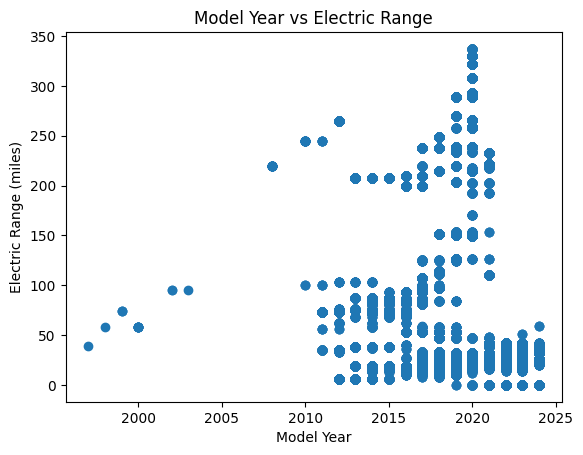

In [15]:
plt.scatter(data_frame['model_year'], data_frame['electric_range'])
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.title('Model Year vs Electric Range')
plt.show()

Count the distribution of vehicle range categories and plot a pie chart

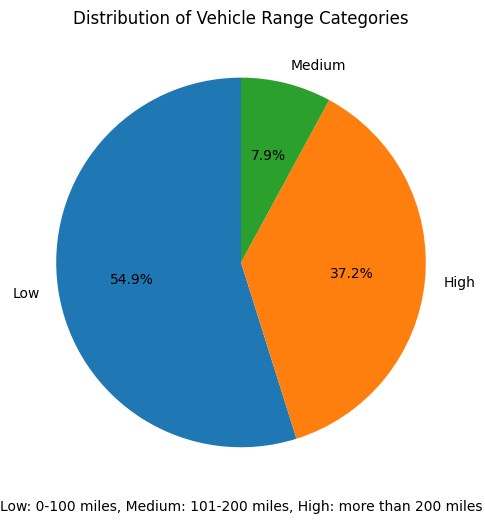

In [16]:
vehicle_range_counts = data_frame['range_category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(vehicle_range_counts, labels=vehicle_range_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Vehicle Range Categories')
plt.xlabel('Low: 0-100 miles, Medium: 101-200 miles, High: more than 200 miles')
plt.show()

Count the distribution of electric vehicle types and plot a pie chart

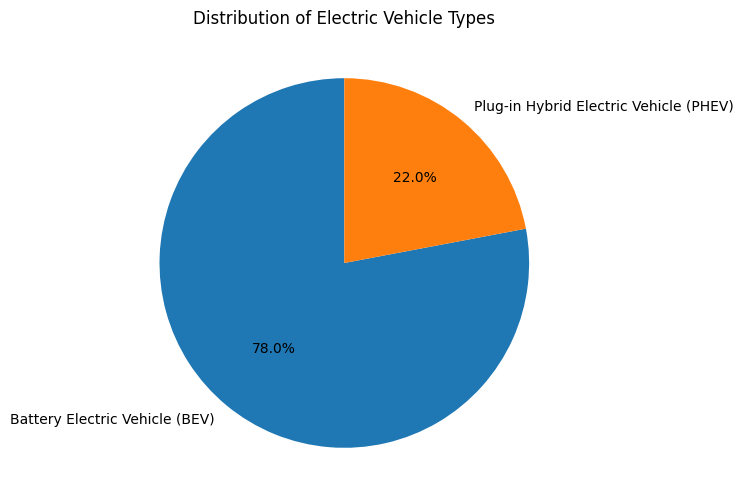

In [17]:
vehicle_type_counts = data_frame['electric_vehicle_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.ylabel('')
plt.show()

Plot a bar graph showing the number of vehicles by make

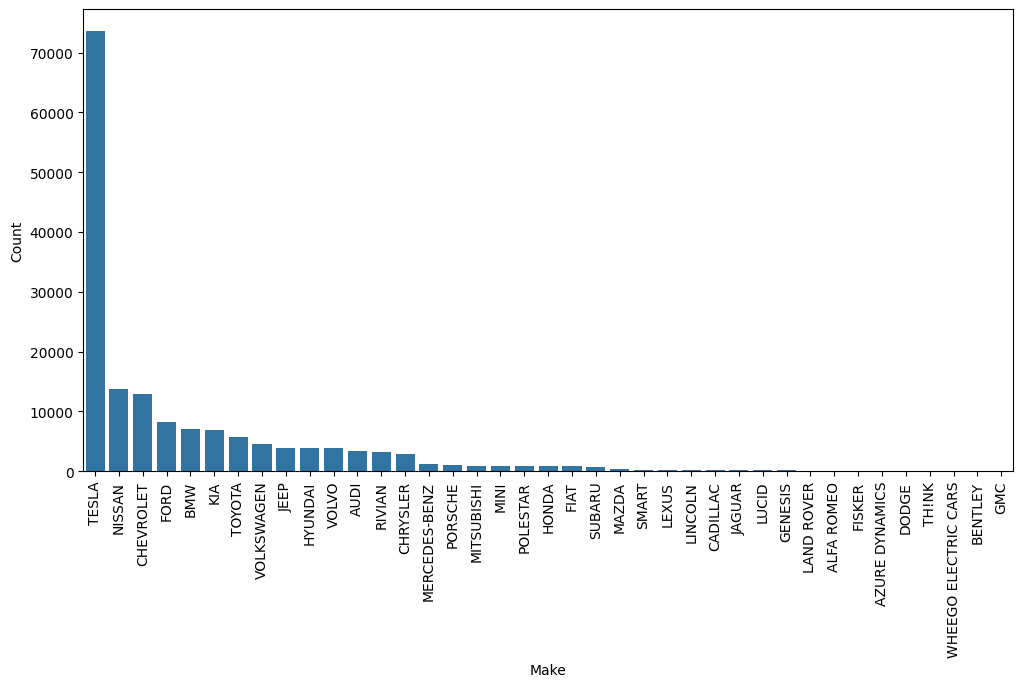

In [18]:
sorted_make_counts = data_frame['make'].value_counts().index
plt.figure(figsize=(12,6))
sns.countplot(data=data_frame, x='make', order=sorted_make_counts)
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

Plot a bar graph showing the number of vehicles by model year

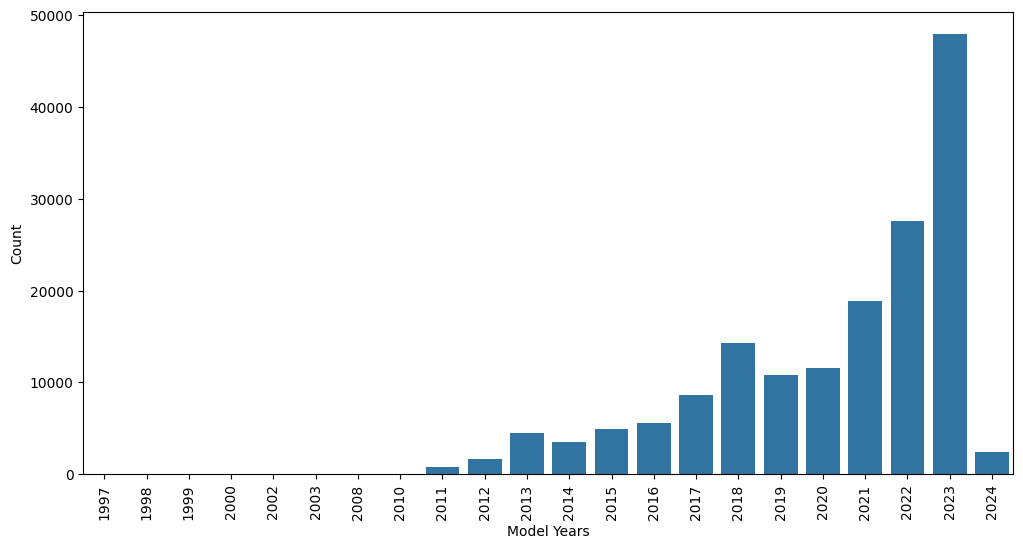

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_frame, x='model_year')
plt.xticks(rotation=90)
plt.xlabel('Model Years')
plt.ylabel('Count')
plt.show()

# Training

One-hot encoding categorical data

In [20]:
categorical_data = data_frame[['electric_vehicle_type']]
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_data.columns))

Preparing the features (X) and target (y) for modeling

In [21]:

X = data_frame[['model_year'] ].join(encoded_df)
y = data_frame['electric_range']

Split data into training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Defining a dictionary of models to evaluate

In [23]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42)
}

Defining hyperparameters for each model

In [24]:
parameters = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree Classifier': {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]},
    'Random Forest Classifier': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
}

Looping through each model to perform GridSearchCV

In [25]:
for name, model in models.items():
    grid_search = GridSearchCV(model, parameters[name], scoring='accuracy', cv=5, n_jobs=-1, refit=True)
    grid_search.fit(X_train, y_train)

    # Using the best parameters to retrain the model
    best_model = grid_search.best_estimator_
    
    # Calculating training score
    train_score = best_model.score(X_train, y_train)

    # Making predictions and calculating test score
    y_pred = best_model.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)

    # Performing cross-validation and calculating scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

    # Printing model performance details
    print(f"{name}:")
    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  Training Score: {train_score}")
    print(f"  Test Score: {test_score}")
    print(f"  Cross-Validation Average Score: {cv_scores.mean()}")
    print(f"  Cross-Validation Standard Deviation: {cv_scores.std()}\n")

    # Checking for overfitting
    if train_score > test_score:
        print(f"  Warning: The {name} model may be overfitting!\n")

    # Printing predictions and actual values
    print(f"Predictions of the {name} model:")
    for i in range(len(y_pred[:10])):
        print(f"Actual: {y_test.iloc[i]}, Prediction: {y_pred[i]}")
    print("\n")

Logistic Regression:
  Best Parameters: {'C': 0.1}
  Training Score: 0.49044493182619897
  Test Score: 0.49084383914603846
  Cross-Validation Average Score: 0.4904449319992482
  Cross-Validation Standard Deviation: 9.212516815827397e-06

Predictions of the Logistic Regression model:
Actual: 73, Prediction: 0
Actual: 17, Prediction: 0
Actual: 0, Prediction: 0
Actual: 6, Prediction: 0
Actual: 0, Prediction: 0
Actual: 0, Prediction: 0
Actual: 32, Prediction: 0
Actual: 0, Prediction: 0
Actual: 322, Prediction: 0
Actual: 53, Prediction: 0




Decision Tree Classifier:
  Best Parameters: {'max_depth': 20, 'min_samples_split': 2}
  Training Score: 0.6765617091762396
  Test Score: 0.6758381644734824
  Cross-Validation Average Score: 0.6763239931732266
  Cross-Validation Standard Deviation: 0.0006111199538341439


Predictions of the Decision Tree Classifier model:
Actual: 73, Prediction: 73
Actual: 17, Prediction: 25
Actual: 0, Prediction: 0
Actual: 6, Prediction: 38
Actual: 0, Prediction: 0
Actual: 0, Prediction: 0
Actual: 32, Prediction: 21
Actual: 0, Prediction: 0
Actual: 322, Prediction: 291
Actual: 53, Prediction: 19




Random Forest Classifier:
  Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
  Training Score: 0.6765540405821997
  Test Score: 0.6754700776049815
  Cross-Validation Average Score: 0.6763546680198523
  Cross-Validation Standard Deviation: 0.0006170007837823415


Predictions of the Random Forest Classifier model:
Actual: 73, Prediction: 73
Actual: 17, Prediction: 25
Actual: 0, Prediction: 0
Actual: 6, Prediction: 38
Actual: 0, Prediction: 0
Actual: 0, Prediction: 0
Actual: 32, Prediction: 21
Actual: 0, Prediction: 0
Actual: 322, Prediction: 291
Actual: 53, Prediction: 19


